In [1]:
import os
import random
import numpy as np
import pylab as plt
%matplotlib inline

import sys
sys.path.insert(0,'./../../../alan/CSGAN/')

import csgan as cs


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../../../dataset/mnist/")

Extracting ../../../dataset/mnist/train-images-idx3-ubyte.gz
Extracting ../../../dataset/mnist/train-labels-idx1-ubyte.gz
Extracting ../../../dataset/mnist/t10k-images-idx3-ubyte.gz
Extracting ../../../dataset/mnist/t10k-labels-idx1-ubyte.gz


In [3]:
x_train = mnist.train.images[:55000,:]
x_train.shape

class data_provider(object):
    def __init__(self,x_train):
        self.x_train = x_train
        self.num = x_train.shape[0]
        
    def __call__(self,n):
        n_list = np.arange(self.num)
        random.shuffle(n_list)
        return self.x_train[n_list[:n]].reshape(n,28,28,1)
        

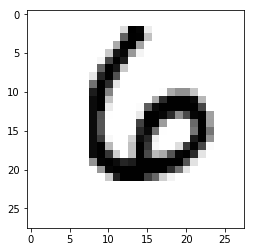

In [4]:
dp = data_provider(x_train)
    
image = dp(10)[0].reshape([28,28])
plt.imshow(image, cmap=plt.get_cmap('gray_r'))
plt.show()

In [5]:
dp(10).shape

(10, 28, 28, 1)

In [7]:
dcgan = cs.DCGAN(
    data_provider = dp,
    batch_size=17,
    gf_dim=16, df_dim=64,
    z_dim=100,
    checkpoint_dir='./checkpoint/',save_per = 100)

dcgan.train(num_epoch=2,batch_per_epoch = 200,verbose=100)

Output size is same as input's!
 [*] Reading checkpoints...
INFO:tensorflow:Restoring parameters from ./checkpoint/28_28/DCGAN.model-2002
 [*] Success to read DCGAN.model-2002
 [*] Load SUCCESS
Epoch: [ 0] [  98/ 200] time: 146.5149, d_loss: 0.28772438, g_loss: 2.44617558
Epoch: [ 0] [ 198/ 200] time: 279.3275, d_loss: 0.11351220, g_loss: 2.94747210
./samples/train_00_0198.png
Epoch: [ 1] [  98/ 200] time: 397.5464, d_loss: 0.15292561, g_loss: 2.45058489
Epoch: [ 1] [ 198/ 200] time: 514.8439, d_loss: 0.12522458, g_loss: 2.60880780
./samples/train_01_0198.png


In [2]:
import tensorflow as tf

input1 = tf.random_normal([1,10,10,32])
input2 = tf.random_normal([1,20,20,32])

def conv_relu(input, kernel_shape, bias_shape):
    # Create variable named "weights".
    weights = tf.get_variable("weights", kernel_shape,
        initializer=tf.random_normal_initializer())
    # Create variable named "biases".
    biases = tf.get_variable("biases", bias_shape,
        initializer=tf.constant_initializer(0.0))
    conv = tf.nn.conv2d(input, weights,
        strides=[1, 1, 1, 1], padding='SAME')
    return tf.nn.relu(conv + biases)


def my_image_filter(input_images):
    with tf.variable_scope("conv1"):
        # Variables created here will be named "conv1/weights", "conv1/biases".
        relu1 = conv_relu(input_images, [5, 5, 32, 32], [32])
    with tf.variable_scope("conv2"):
        # Variables created here will be named "conv2/weights", "conv2/biases".
        return conv_relu(relu1, [5, 5, 32, 32], [32])


with tf.variable_scope("model"):
    output1 = my_image_filter(input1)
with tf.variable_scope("model", reuse=True):
    output2 = my_image_filter(input2)


In [3]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

[u'random_normal/shape',
 u'random_normal/mean',
 u'random_normal/stddev',
 u'random_normal/RandomStandardNormal',
 u'random_normal/mul',
 u'random_normal',
 u'random_normal_1/shape',
 u'random_normal_1/mean',
 u'random_normal_1/stddev',
 u'random_normal_1/RandomStandardNormal',
 u'random_normal_1/mul',
 u'random_normal_1',
 u'model/conv1/weights/Initializer/random_normal/shape',
 u'model/conv1/weights/Initializer/random_normal/mean',
 u'model/conv1/weights/Initializer/random_normal/stddev',
 u'model/conv1/weights/Initializer/random_normal/RandomStandardNormal',
 u'model/conv1/weights/Initializer/random_normal/mul',
 u'model/conv1/weights/Initializer/random_normal',
 u'model/conv1/weights',
 u'model/conv1/weights/Assign',
 u'model/conv1/weights/read',
 u'model/conv1/biases/Initializer/Const',
 u'model/conv1/biases',
 u'model/conv1/biases/Assign',
 u'model/conv1/biases/read',
 u'model/conv1/Conv2D',
 u'model/conv1/add',
 u'model/conv1/Relu',
 u'model/conv2/weights/Initializer/random_nor